In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


/Users/shruti/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from pandas.io.data import DataReader

/Users/shruti/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
from datetime import datetime

In [4]:
from __future__ import division

In [5]:
tech_list = ['AAPL', 'GOOG','MSFT','AMZN']

#Set up Start and End times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Loop to grab data from Yahoo stocks and setting into DataFrame

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [6]:
#Summary stats:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.777897,118.856071,116.451389,117.632658,5.128302e+07,116.280223
std,10.695500,10.509046,10.847384,10.655670,2.070377e+07,10.058480
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,111.369997,112.422497,109.785000,111.534997,3.729540e+07,110.621153
50%,118.724998,119.740002,117.559998,118.954998,4.682590e+07,118.129812
75%,126.992498,127.827499,125.802500,126.757500,5.860950e+07,124.674970
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,130.671320


In [7]:
AMZN.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,509.594127,515.171111,503.098572,509.097819,4049967.063492,509.097819
std,98.342885,99.488962,95.955792,97.848545,2411315.800873,97.848545
min,367.109985,371.399994,365.649994,366.369995,1091200.000000,366.369995
25%,428.000000,432.112510,425.637505,427.765000,2580275.000000,427.765000
50%,514.825012,521.149994,507.680008,516.335022,3551600.000000,516.335022
75%,578.360016,589.857499,569.910004,576.717515,4709850.000000,576.717515
max,691.890015,696.440002,686.380005,693.969971,21909400.000000,693.969971


In [8]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,627.856305,633.760093,621.019842,627.419055,2173368.253968,627.419055
std,82.587896,83.836811,80.618699,82.076506,1161706.684710,82.076506
min,519.500000,522.734009,515.179993,516.830017,527200.000000,516.830017
25%,540.112518,544.009966,536.894989,540.705017,1514375.000000,540.705017
50%,627.979981,633.208007,621.250000,627.084992,1864600.000000,627.084992
75%,710.125000,718.265015,701.320007,708.422516,2350225.000000,708.422516
max,784.500000,789.869995,766.900024,776.599976,11164900.000000,776.599976


In [9]:
MSFT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,47.655992,48.158611,47.213849,47.702540,3.659118e+07,46.931012
std,4.527139,4.545726,4.442904,4.498314,1.559504e+07,4.700131
min,40.340000,40.740002,39.720001,40.290001,9.009100e+06,39.219761
25%,43.945001,44.275001,43.587498,43.970000,2.736295e+07,43.292761
50%,46.790001,47.145000,46.429998,46.805000,3.276590e+07,45.959387
75%,52.002499,52.780000,51.452500,52.162499,3.972052e+07,51.798093
max,56.470001,56.849998,56.290001,56.549999,1.352271e+08,56.146870


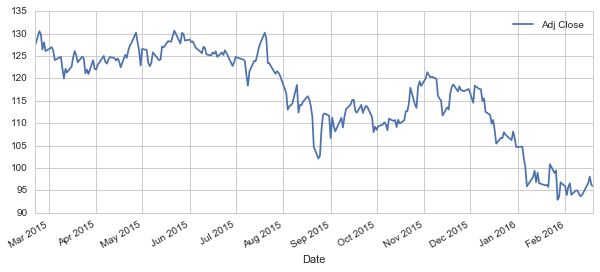

In [10]:
#Lets look at the graph of the volume and closing stock price for Apple
AAPL['Adj Close'].plot(legend = True, figsize =(10,4))

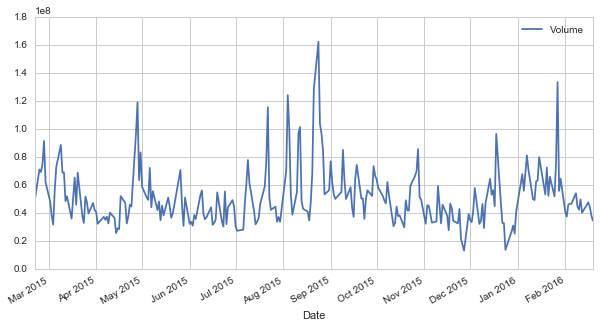

In [11]:
#Now the total volume of stock being traded each day 
AAPL['Volume'].plot(legend = True, figsize = (10,5))

In [12]:
#Moving average for the stock:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'], ma)

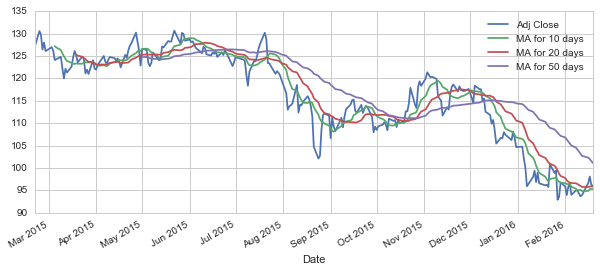

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


Next, we will be looking into the risk analysis of stocks for Apple in this case

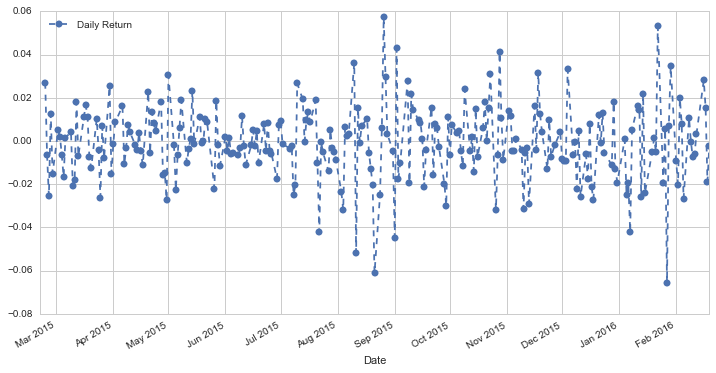

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,6),legend = True, linestyle="--",marker = 'o')

To get an idea of the overall look of the average daily return using a histogram and a KDE plot 

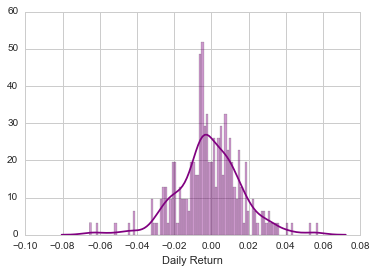

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

We can go ahead and analyze the returns of all the stocks in the list:

In [16]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-20,127.143110,383.660004,538.952441,42.694930
2015-02-23,130.579411,380.140015,531.912381,42.977227
2015-02-24,129.764515,378.589996,536.092424,42.918820
2015-02-25,126.446026,385.369995,543.872489,42.821477
2015-02-26,128.046365,384.799988,555.482516,42.889618


In [18]:
tech_rets = closing_df.pct_change()

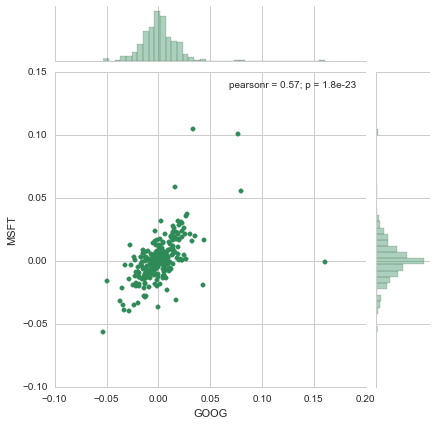

In [19]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color = 'seagreen')

To view comparisons for all possible combination of stocks:

/Users/shruti/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


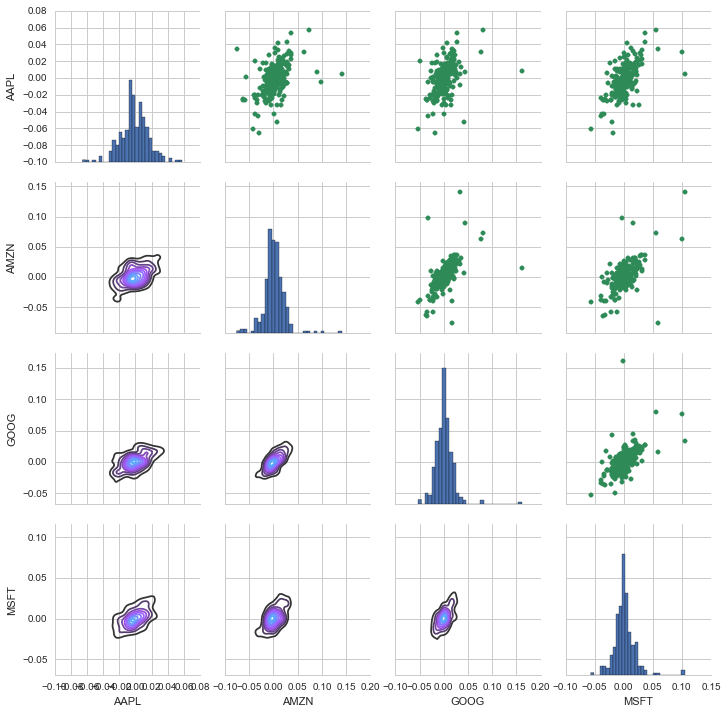

In [20]:
# set up a figure and call PairPlot on it
returns_fig = sns.PairGrid(tech_rets.dropna())

# specify the upper triangle of the map
returns_fig.map_upper(plt.scatter,color = 'seagreen')

# Define the lower triangle:
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Diagonal will be a series of histogram plots of thr daily returns:
returns_fig.map_diag(plt.hist,bins=30)

Amazon and Google look to have the strongest correlation of daily stock returm but overall, all these companies are positively correlated.

/Users/shruti/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/shruti/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


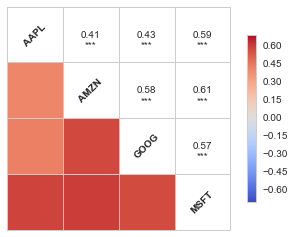

In [21]:
sns.corrplot(tech_rets.dropna(),annot=True)

    This heatmap check verifies the correlation between Amazon and Google

We can run a risk analysis by comparing expected return with standard deviation of daily returns

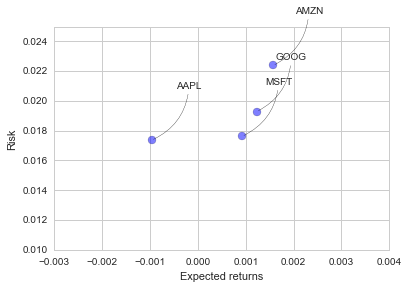

In [23]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot 
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))